# 1. Set-up

### Required packages (need to install these in the environment)

In [37]:
!pip install geopandas
!pip install Shapely

In [215]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import MultiPolygon
from shapely.geometry import MultiLineString
from shapely.ops import split

# 2. Download Data

In [15]:
api_key = "SEieCj3uYQ3ufDsCqFWAfw56GvXKyLr1YTt9K4Sv"
base_url = "https://developer.nrel.gov/api/alt-fuel-stations/v1"
download_format = "csv"
state = "CT"
fuel_type = "ELEC"

In [16]:
download_URL = base_url + "." + download_format + "?" + "api_key=" + api_key + "&" + "state=" + state + "&" + "fuel_type=" + fuel_type

In [17]:
download_URL

'https://developer.nrel.gov/api/alt-fuel-stations/v1.csv?api_key=SEieCj3uYQ3ufDsCqFWAfw56GvXKyLr1YTt9K4Sv&state=CT&fuel_type=ELEC'

In [38]:
csv = pd.read_csv(download_URL)

# 3. Plot

### Create Roads

In [128]:
roads = gpd.read_file('data/us_roads')

[]

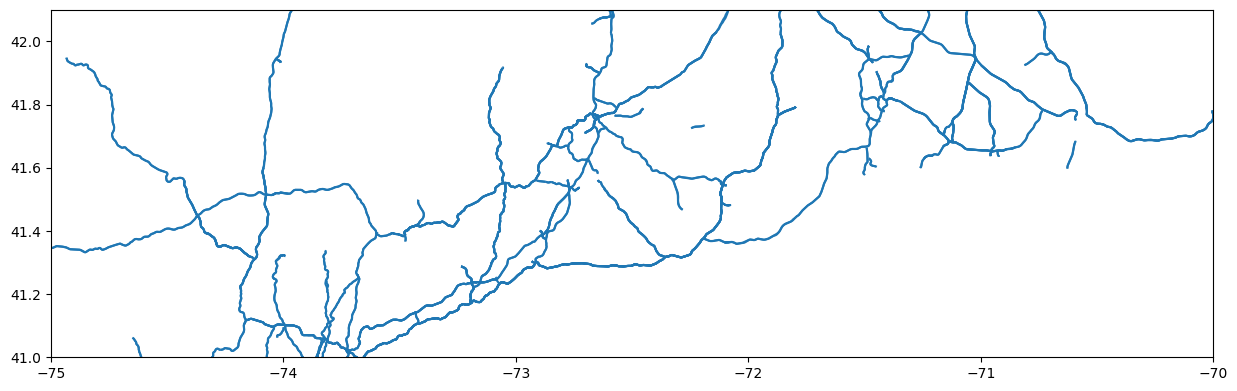

In [243]:
ax = roads.plot(figsize = (15,15))
ax.set_xlim(-75, -70)
ax.set_ylim(41,42.1)
ax.plot()

In [180]:
roads_in_CT = roads[roads.within(list(states_CT["geometry"])[0])]

### Create States GeoDataFrame

In [111]:
states_filter = [ st != "Alaska"
              and st != "Guam"
              and st != "Hawaii" 
              and st !="Puerto Rico" 
              and st != "Commonwealth of the Northern Mariana Islands"
              and st != "United States Virgin Islands" 
              and st != "American Samoa"
              for st in states["NAME"]]

In [130]:
states = gpd.read_file('data/us_state_shapefiles')
states_filtered = states[states_filter]
states_CT = states[states["NAME"] == "Connecticut"]

In [101]:
# Project to Mercator
states_filtered = states_filtered.to_crs("EPSG:3395")

<AxesSubplot:>

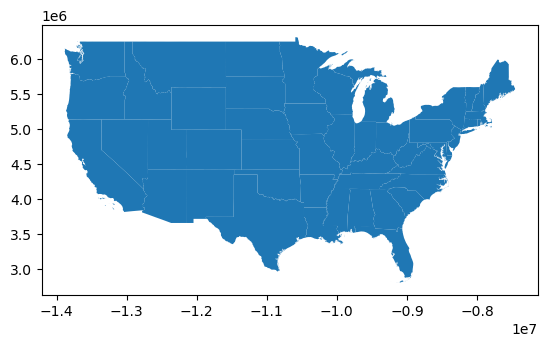

In [102]:
states_filtered.plot()

### Create Points GeoDataFrame

In [53]:
geometry = [Point(xy) for xy in zip(csv["Longitude"], csv["Latitude"])]
gdf = GeoDataFrame(csv, geometry = geometry)

In [248]:
gdf.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [257]:
gdf[gdf["EV DC Fast Count"] > 0]

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,geometry
15,ELEC,Harte Nissan,165 W Service Rd,NaN,Hartford,CT,6120,NaN,860-549-2800,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.65668 41.79138)
21,ELEC,Middletown Nissan,1153 Newfield St,NaN,Middletown,CT,6457,NaN,860-632-6550,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.67614 41.59054)
25,ELEC,Executive Nissan,900 Universal Dr N,NaN,North Haven,CT,6473,NaN,203-239-5371,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.87100 41.36089)
28,ELEC,Grossman Nissan,295 Middlesex Turnpike,NaN,Old Saybrook,CT,6475,NaN,860-388-5785,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.38311 41.30928)
30,ELEC,Barberino Nissan,505 N Colony St,NaN,Wallingford,CT,6492,NaN,203-265-1611,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.81759 41.46738)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,ELEC,"BOA East Hartford CT2-120 (Hartford, CT)",805 E Main Street,NaN,East Hartford,CT,6108,NaN,833-632-2778,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.64556 41.76802)
691,ELEC,HARTFORD BMW ABB OUTSIDE,1 Weston Park Rd,NaN,Hartford,CT,6120,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-72.66644 41.78213)
743,ELEC,"Vernon, CT - Tesla Supercharger",145 Talcottville Rd,NaN,Vernon,CT,6066,NaN,877-798-3752,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-72.49584 41.83108)
747,ELEC,Fairfield Centre Shopping Center - Tesla Super...,696-700 Post Rd,NaN,Fairfield,CT,6824,NaN,877-798-3752,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,POINT (-73.24701 41.14982)


### Plot (World)

C:\Users\rajan\AppData\Local\Temp\ipykernel_2684\551576213.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

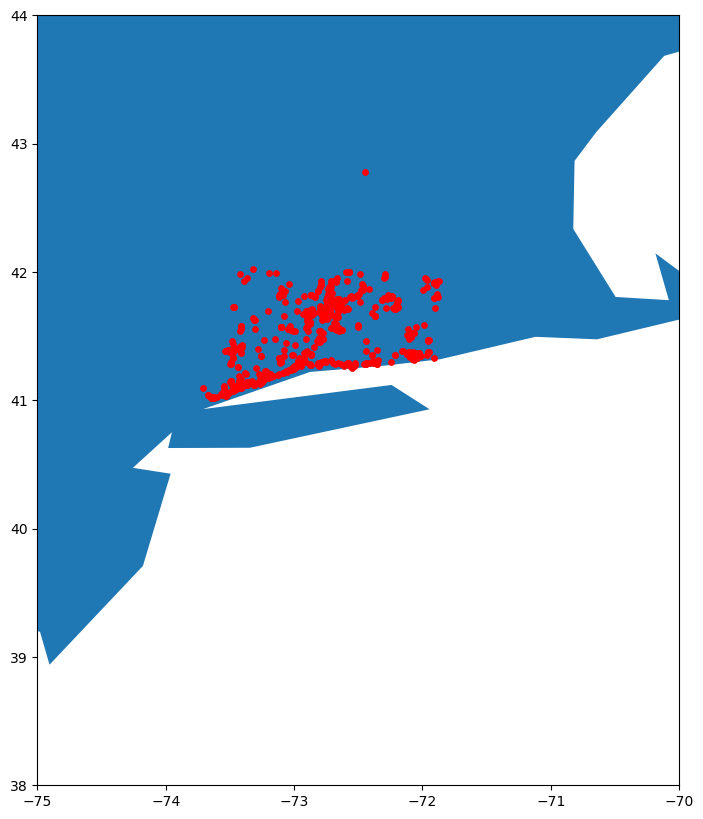

In [245]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize = (10,10))
ax.set_xlim(-75, -70)
ax.set_ylim(38,44)
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
#gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15)

### Plot (States)

Attempting to create a set of points from the CT boundary so I can work out what the minimum longitude and latitude are.

In [217]:
mls = MultiLineString(list(states_CT.boundary)[0])

Much much simpler way

In [237]:
states_CT.bounds

,minx,miny,maxx,maxy
55,-73.727775,40.980144,-71.786994,42.050587


<AxesSubplot:>

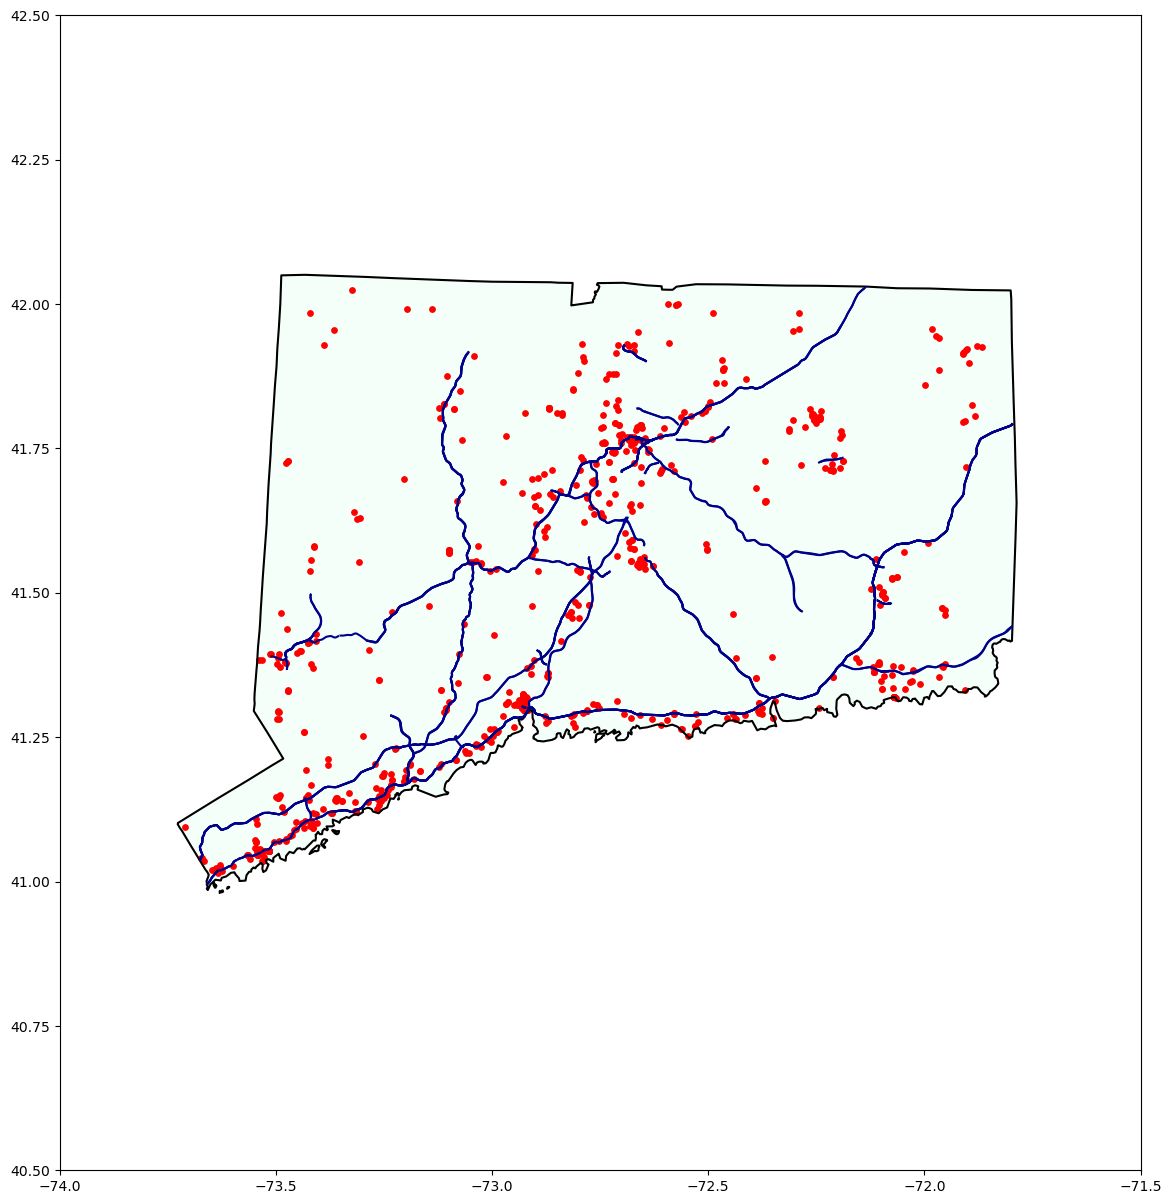

In [193]:
xlim = min(states_CT.boundary)
ax_states = states_CT.plot(figsize  = (15,15), color = "mintcream")
ax_states.set_xlim(-74, -71.5)
ax_states.set_ylim(40.5,42.5)
gdf.plot(ax = ax_states, marker = 'o', color = 'red', markersize = 15)
states_CT.boundary.plot(ax = ax_states, color = "black")
roads_in_CT.plot(ax=ax_states, color = "darkblue")